In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
data=pd.read_csv("Mall_Customers.csv")

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


Text(0, 0.5, 'Count')

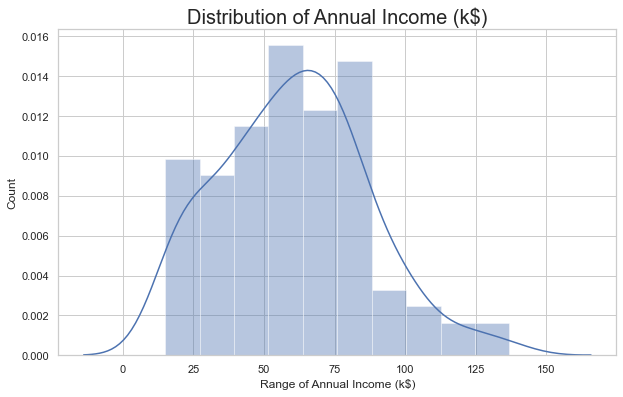

In [7]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

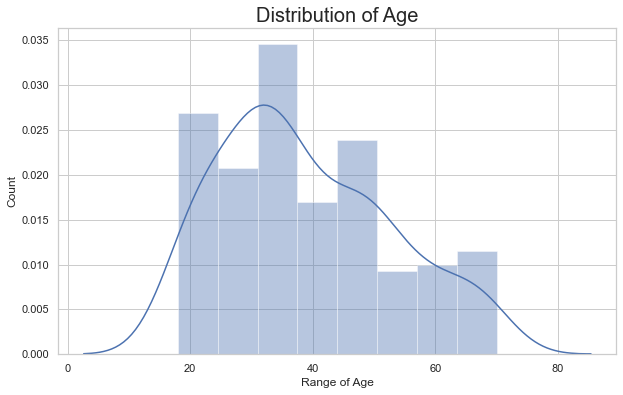

In [8]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

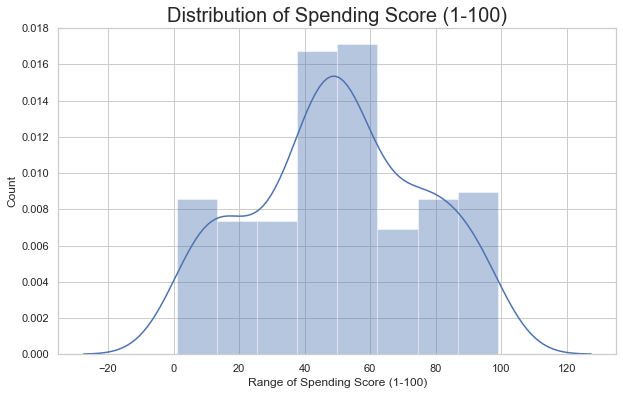

In [9]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

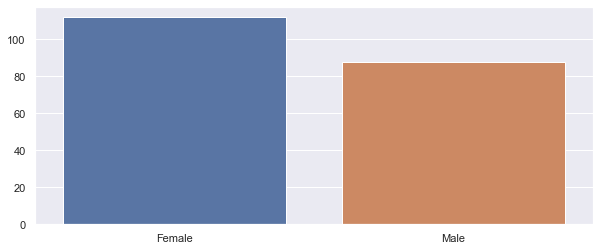

In [10]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [11]:
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [12]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


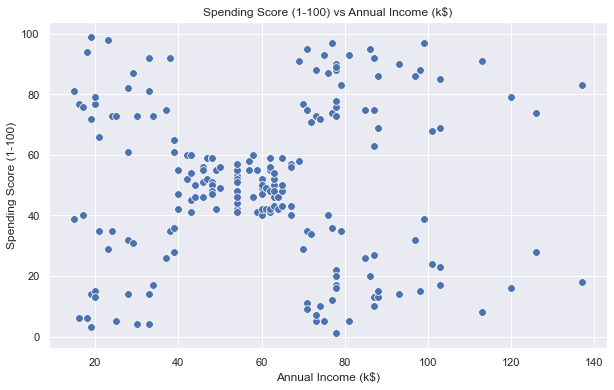

In [13]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [14]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [15]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

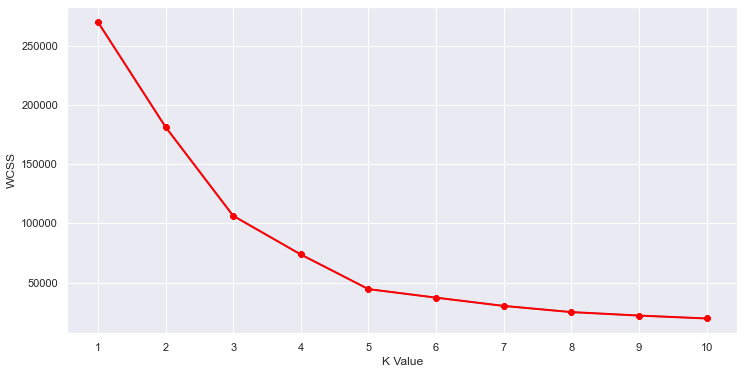

In [16]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [17]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2


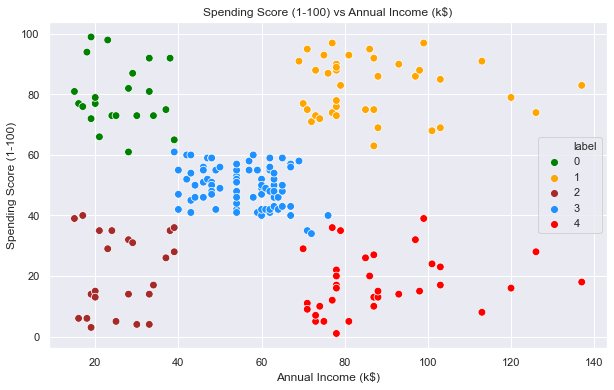

In [18]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

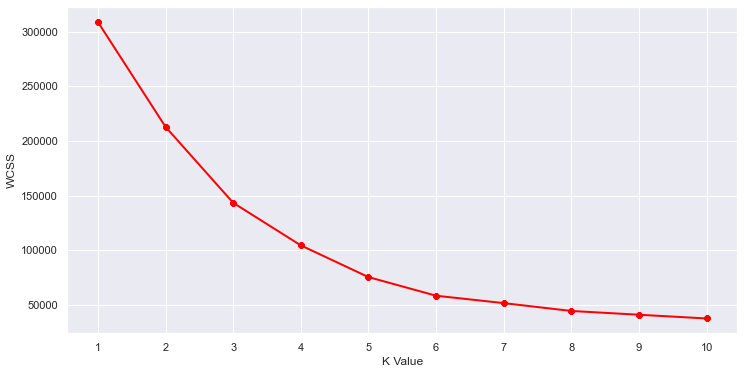

In [21]:
#Taking the features
X2=df1[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [24]:
#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
df1["label"] = y2
#The data with labels
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,7
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,7


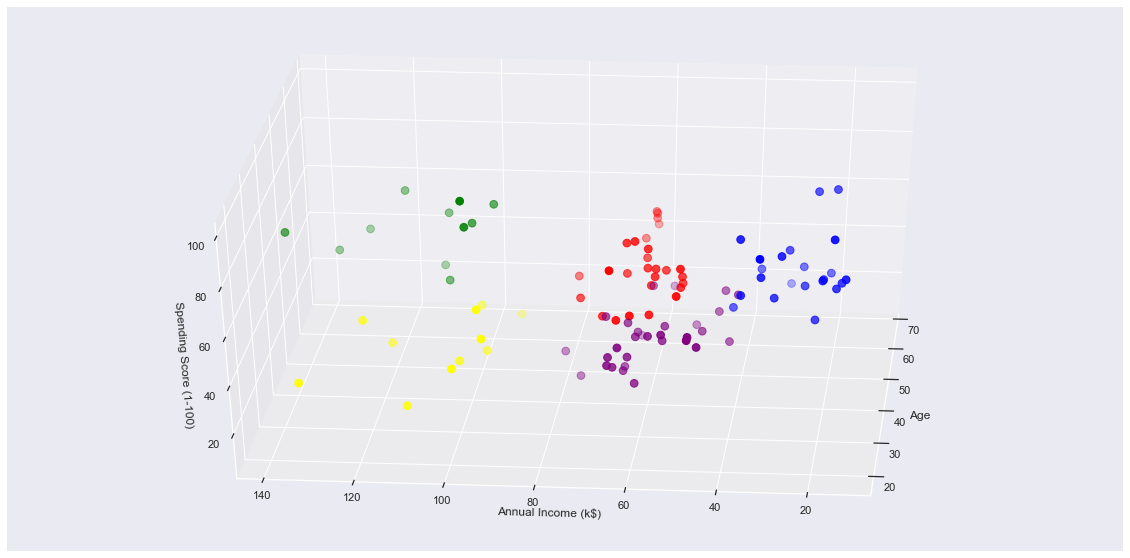

In [26]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Age[df1.label == 0], df1["Annual Income (k$)"][df1.label == 0], df1["Spending Score (1-100)"][df1.label == 0], c='purple', s=60)
ax.scatter(df1.Age[df1.label == 1], df1["Annual Income (k$)"][df1.label == 1], df1["Spending Score (1-100)"][df1.label == 1], c='red', s=60)
ax.scatter(df1.Age[df1.label == 2], df1["Annual Income (k$)"][df1.label == 2], df1["Spending Score (1-100)"][df1.label == 2], c='blue', s=60)
ax.scatter(df1.Age[df1.label == 3], df1["Annual Income (k$)"][df1.label == 3], df1["Spending Score (1-100)"][df1.label == 3], c='green', s=60)
ax.scatter(df1.Age[df1.label == 4], df1["Annual Income (k$)"][df1.label == 4], df1["Spending Score (1-100)"][df1.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [27]:
cust1=df1[df1["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df1[df1["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df1[df1["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df1[df1["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df1[df1["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

Number of customer in 1st group= 27
They are - [ 77  78  80  84  86  90  93  94  97  99 102 105 107 108 109 110 111 113
 117 118 119 120 122 123 127 147 161]
--------------------------------------------
Number of customer in 2nd group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------------------
Number of customer in 3rd group= 30
They are - [ 44  48  52  53  59  62  66  69  70  76  79  82  85  88  89  92  95  96
  98 100 101 104 106 112 114 115 116 121 133 143]
--------------------------------------------
Number of customer in 4th group= 11
They are - [180 182 184 186 188 190 192 194 196 198 200]
--------------------------------------------
Number of customer in 5th group= 11
They are - [179 181 183 185 187 189 191 193 195 197 199]
--------------------------------------------


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import pdist, squareform

# Applying K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(df1)
df1['Cluster'] = kmeans.labels_

# Silhouette Coefficient
silhouette = silhouette_score(df[numerical_data.columns], df['Cluster'])

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(df[numerical_data.columns], df['Cluster'])

# Dunn Index - Calculation requires distance matrix
def dunn_index(data, labels):
    distances = pdist(data)
    distance_matrix = squareform(distances)
    unique_clusters = np.unique(labels)
    
    min_intercluster = np.inf
    max_intracluster = 0
    
    for i in unique_clusters:
        for j in unique_clusters:
            if i != j:
                data_i = data[labels == i]
                data_j = data[labels == j]
                intercluster_distance = np.min(distance_matrix[labels == i, :][:, labels == j])
                min_intercluster = min(min_intercluster, intercluster_distance)
    
    for k in unique_clusters:
        data_k = data[labels == k]
        if data_k.shape[0] > 1:  # Avoid division by zero
            intracluster_distance = np.max(pdist(data_k))
            max_intracluster = max(max_intracluster, intracluster_distance)
    
    return min_intercluster / max_intracluster

dunn = dunn_index(df[numerical_data.columns].values, df['Cluster'].values)

print(f"Silhouette Coefficient: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Dunn Index: {dunn}")

0       55
1       19
2       50
3       21
4       45
        ..
3895    40
3896    52
3897    46
3898    44
3899    52
Name: Age, Length: 3900, dtype: int64

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

Gender : 2
Item Purchased : 25
Category : 4
Location : 50
Size : 4
Color : 25
Season : 4
Subscription Status : 2
Payment Method : 6
Shipping Type : 6
Discount Applied : 2
Promo Code Used : 2
Preferred Payment Method : 6
Frequency of Purchases : 7


(3900, 23)
(3900, 23)


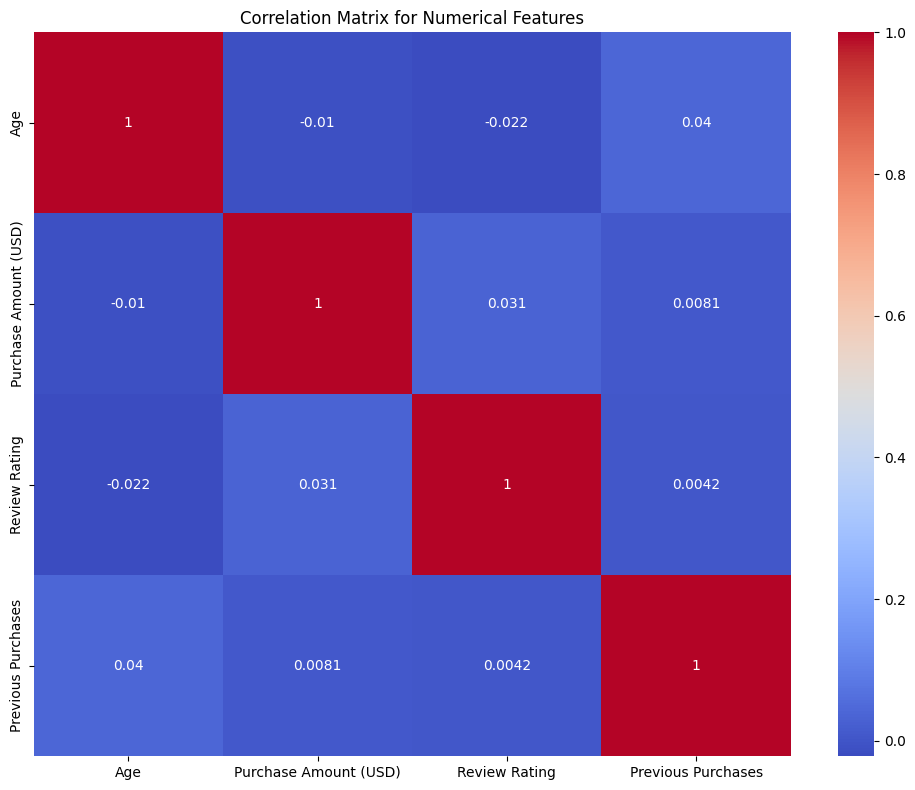

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,0.718913,-0.285629,-0.907584,-0.785831
1,-1.648629,0.178852,-0.907584,-1.616552
2,0.390088,0.558882,-0.907584,-0.162789
3,-1.517099,1.276716,-0.349027,1.637107
4,0.061263,-0.454531,-1.466141,0.391025
...,...,...,...,...
3895,-0.267563,-1.341267,0.628448,0.460252
3896,0.521618,-0.454531,1.047366,1.083293
3897,0.127028,-1.130139,-1.186862,-0.093563
3898,-0.004502,0.727784,0.069891,-0.093563


,Customer ID,Age,Gender,Purchase Amount (USD),Size,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Frequency of Purchases
0,1,55,1,53,3,3.1,1,1,14,4
1,2,19,1,64,3,3.1,1,1,2,4
2,3,50,1,73,1,3.1,1,1,23,5
3,4,21,1,90,2,3.5,1,1,49,5
4,5,45,1,49,2,2.7,1,1,31,1
...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,0,28,3,4.2,0,0,32,5
3896,3897,52,0,49,3,4.5,0,0,41,6
3897,3898,46,0,33,3,2.9,0,0,24,2
3898,3899,44,0,77,1,3.8,0,0,24,5


,Age,Gender,Purchase Amount (USD),Size,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Frequency of Purchases
0,55,1,53,3,3.1,1,1,14,4
1,19,1,64,3,3.1,1,1,2,4
2,50,1,73,1,3.1,1,1,23,5
3,21,1,90,2,3.5,1,1,49,5
4,45,1,49,2,2.7,1,1,31,1
...,...,...,...,...,...,...,...,...,...
3895,40,0,28,3,4.2,0,0,32,5
3896,52,0,49,3,4.5,0,0,41,6
3897,46,0,33,3,2.9,0,0,24,2
3898,44,0,77,1,3.8,0,0,24,5


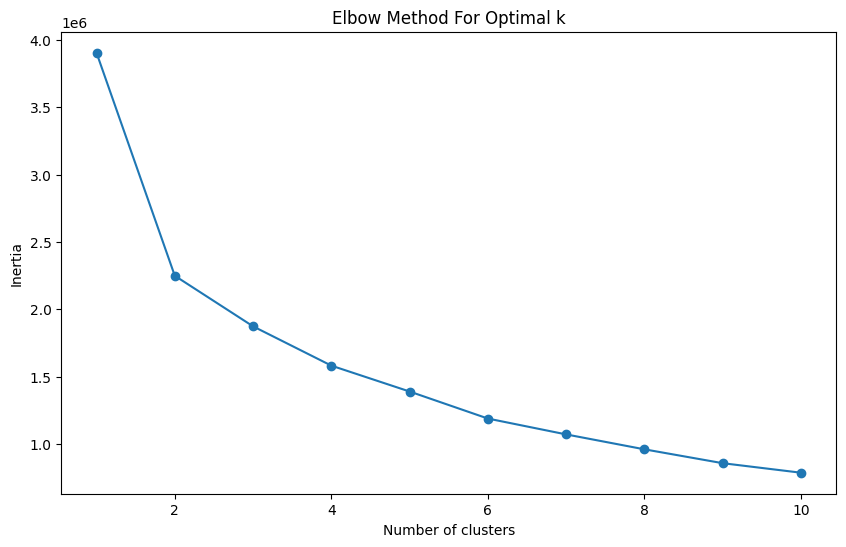